# Защита персональных данных клиентов

**Описание проекта**

Необходимо разработать метод преобразования исходных данных, позволяющий в значительной степени усложнить восстановление персональной информации. Также требуется провести обоснование корректности его работы.

Персональные данные необходимо защитить таким образом, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.


**Цель:** Защита персональных данных клиентов страховой компании.


**Задачи:**
1. Загрузить и проанализировать данные.
2. Применить к данным свойства матриц в линейной регрессии.
3. Проверить алгоритмы в работе.


**Описание данных:** Данные находятся в файле `insurance.csv`.

* **Признаки:**
    * `Пол`
    * `Возраст`
    * `Зарплата`
    * `Члены семьи`

* **Целевой признак:**
    * `Страховые выплаты`


**План выполнения работы:**
* 1. Загрузка и анализ данных
    * 1.1 Загрузка исходных данных
    * 1.2 Анализ признаков
    * 1.3 Проверка корреляций
    * 1.4 Выводы
* 2. Применение свойств матриц в линейной регрессии
    * 2.1 Задача проверки качества линейной регрессии
    * 2.2 Алгоритм преобразования матрицы признаков
    * 2.3 Выводы
* 3. Проверка алгоритма в работе
    * 3.1 Обучение модели на исходных данных
    * 3.2 Обучение на преобразованных данных
    * 3.3 Реализация линейной регрессии
    * 3.4 Выводы
* 4. Общие выводы

## Загрузка и анализ данных

### Загрузка исходных данных

Подключим необходимые для работы библиотеки:
* `pandas` - для работы с таблицами;
* `numpy` - для операций над массивами;
* `seaborn` - для визуализации данных;
* `sklearn` - инструменты машинного обучения (модели регрессии, метрики качества моделей, разделение данных, предобработка данных).

In [1]:
import pandas as pd
import numpy as np

from scipy.linalg import pascal

# обучение моделей
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# метрики
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

Зададим начальное значение генератора псевдослучайных чисел для вопроизводимости полученных в исследовании результатов.

In [2]:
# начальное значение генератора псевдослучайных чисел
RND = 123

Исходные данные представлены в одном файле. Загрузим и проведём их предварительную оценку. Посмотрим на общий вид табличных данных, сводную информацию и проверим количество пропущенных значений в исследуемой таблице из файла `insurance.csv`.

In [3]:
# чтение файла insurance.csv 
df = pd.read_csv('/datasets/insurance.csv')

In [4]:
# вывод первых строк таблицы изучаемых данных
df.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [5]:
# просмотр сводной информации о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
# подсчёт количества пропущенных значений
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

> * Данные успешно загружены из файла. Таблица содержит `5000` записей с данными клиентов страховой компании. Данные соотвествуют описанию. Пропусков в данных нет.
> * Все атрибуты количественные, при этом из них `3` целочисленных (пол, члены семьи и страховые выплаты) и `2` вещественных (возраст и зарплата).
> * Целевым признаком является событие наступления страховой выплаты.
> * Установлено использование кириллических символов в наименованиях атрибутов. Чтобы избежать возможных проблем в работе с такими символами далее переведём названия признаков на английский язык.

### Предобработка данных

Присвоим названиям атрибутов их английские эквиваленты.

In [7]:
# переименование названий атрибутов
df.columns = ['gender', 'age', 'salary', 'family_members', 'pay_count']

Для атрибутов возраст и зарплата, с учётом их фактических значений, целесообразно выполнить преобразование к целочисленному типу `int64`, которое может быть осуществлено без потери точности.

In [8]:
# преобразование типов данных
df['age'] = df['age'].astype('int64')
df['salary'] = df['salary'].astype('int64')

Посмотрим на основные описательные статистики для предоставленных данных.

In [9]:
# просмотр основных описательных статистик данных
df.describe()

,gender,age,salary,family_members,pay_count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


> * Среди клиентов страховой компании мужчины и женщины представлены в равных долях.
> * По возрасту клиенты находятся в диапазоне от `18` до `65` лет, по уровню заработной платы - от `5300` до `79000` рублей.
> * По количеству членов семьи - от `0` (т.е. несемейные) до `6`.
> * Число страховых выплат клиентам - от `0` (т.е. отсутствие страховых случаев за рассматриваемый период) до `5`.

Для удобства оценки распределения исходных данных введём дополнительный признак - факт наличия страховых выплат (`pay_count > 0`).

In [10]:
# добавление дополнительного атрибута в виде факта наличия страховых выплат
df['payout'] = (df['pay_count'] > 0).astype('int64')

Проведём оценку признаков с целью получения представления о распределении их значений.

Для удобства работы и сокращения количества кода при выполнении однотипных операций создадим две вспомогательные функции: *num_feature_research()* и *cat_feature_research()*.

In [11]:
# функция для построения парных графиков в виде гистограмм распределения частот и диаграмм размаха
def num_feature_research(feature, chart_title, x_lims=(0, 100), discrete=False):    
    """
    input: feature (str)        - наименование признака
           chart_title (str)    - наименование графика
           x_lims (tuple)       - диапазон значений по оси X
           discrete (bool)      - избегать пробелов в случае дискретных значений по оси Х
    output: None
    description: Функция принимает input параметры, выводит таблицу с описательными статистиками, строит диаграмму 
                 размаха и графики распределение частот для исследуемого признака
    """
    print(f'Признак: «{feature}»')
    display(df[feature].describe())
        
    print()
    print('-' * 95)
    print('| {: <80}|'.format(f'Количество пропущенных значений признака «{feature}»:'), end='')
    print('{: >10.5f} |'.format(df[feature].isna().sum()))
    print('-' * 95)
    print('| {: <80}|'.format(f'Доля пропущенных значений признака «{feature}»:'), end='')
    print('{: >10.5f} |'.format(round((df[feature].isna().sum() / df.shape[0]), 5)))
    print('-' * 95)
    print()
    
    sns.set()
    sns.set_palette(palette='Set1')
    f, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw=dict(height_ratios=[1, 4]))
    f.subplots_adjust(hspace=0)

    axes[0].set_title(f'График распределения признака «{feature}» \n {chart_title}', fontsize=17)
    axes[0] = sns.boxplot(x=df[feature], y=df['payout'], orient='h', ax=axes[0])
    axes[0].set_xlim(x_lims)
    axes[0].set_xticklabels([])
    


    axes[1].set_ylabel('', fontsize=14)
    axes[1] = sns.histplot(
        data=df,
        x=feature,
        hue=df['payout'],
        alpha=0.3,
        ax=axes[1],
        kde=True,
        discrete=discrete,
        bins=50
    )
    axes[1].set_ylabel('Частота встречаемости', fontsize=14)
    axes[1].set_xlabel(chart_title, fontsize=14)
    axes[1].set_xlim(x_lims)
    plt.show();
    
    return None

In [12]:
# функция для построения парных графиков в виде гистограмм распределения частот и диаграмм размаха
def cat_feature_research(data, x_val, y_val, hue, chart_title):    
    """
    input: data (pandas.DataFrame) - данные для построения графиков
           x_val (str)             - наименование признака по оси X
           y_val (str)             - наименование признака по оси Y
           hue                     - наименование признака для разделения
           chart_title (str)       - наименование графика
    output: None
    description: Функция принимает input параметры и проводит анализ категориальных признаков
    """
    print()
    print('-' * 95)
    print('| {: <80}|'.format(f'Количество пропущенных значений признака «{x_val}»:'), end='')
    print('{: >10d} |'.format(df[x_val].isna().sum()))
    print('-' * 95)
    print('| {: <80}|'.format(f'Доля пропущенных значений признака «{x_val}»:'), end='')
    print('{: >10.5f} |'.format(round((df[x_val].isna().sum() / df.shape[0]), 5)))
    print('-' * 95)
    print()
    
    # подсчёт долей каждого из классов целевого признака по отношению ко всем данным
    target_rate = df[x_val].value_counts() / df.shape[0]
    display(target_rate)
    
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.set_palette(palette='Accent')
    ax = sns.barplot(data=data, x=x_val, y=y_val, hue=hue)
    ax.set_title(f'Распределение выплат по признаку «{chart_title}»\n', fontsize=17)
    ax.set_xlabel(chart_title, fontsize=14)
    ax.set_ylabel('Количество выплат', fontsize=14)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/df[y_val].count())
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x-0.15, y+50), ha='center', fontsize=14)
    plt.show();
    
    return None

### Анализ данных

#### Пол (`gender`)

Рассмотрим распределение значений признака наличия страховых выплат `pay_count` в атрибуте пол `gender`. Для этого создадим вспомогательную сводную таблицу.

In [13]:
# формирование сводной таблицы для распределения признака наличия страховых выплат pay_count в атрибуте пол - gender
df_pays = df.pivot_table(index=['gender', 'payout'], values='pay_count', aggfunc='count').reset_index()
df_pays

,gender,payout,pay_count
0,0,0,2221
1,0,1,284
2,1,0,2215
3,1,1,280



-----------------------------------------------------------------------------------------------
| Количество пропущенных значений признака «gender»:                              |         0 |
-----------------------------------------------------------------------------------------------
| Доля пропущенных значений признака «gender»:                                    |   0.00000 |
-----------------------------------------------------------------------------------------------



0    0.501
1    0.499
Name: gender, dtype: float64

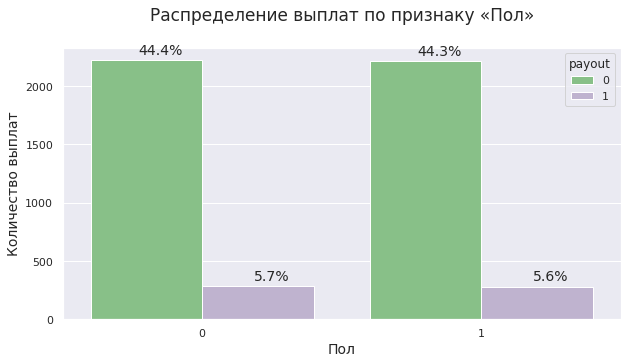

In [14]:
# оценка распределения признака наличия страховых выплат pay_count в атрибуте пол - gender
cat_feature_research(df_pays, 'gender', 'pay_count', 'payout', 'Пол')

> * По атрибуту пол `gender` клиенты представлены равномерно - в том числе и относительно наличия/отсутствия страховых выплат за рассматриваемый период. 
> * Пропущенных значений по данному признаку нет.

#### Возраст (`age`)

Рассмотрим распределение значений в признаке возраст `age`.

Признак: «age»


count    5000.000000
mean       30.952800
std         8.440807
min        18.000000
25%        24.000000
50%        30.000000
75%        37.000000
max        65.000000
Name: age, dtype: float64


-----------------------------------------------------------------------------------------------
| Количество пропущенных значений признака «age»:                                 |   0.00000 |
-----------------------------------------------------------------------------------------------
| Доля пропущенных значений признака «age»:                                       |   0.00000 |
-----------------------------------------------------------------------------------------------



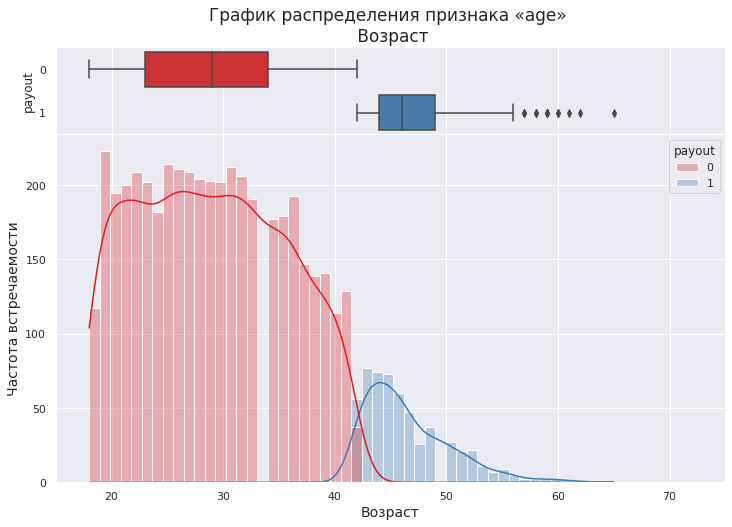

In [15]:
# оценка распределения признака возраст - age
num_feature_research('age', 'Возраст', x_lims=(15, 75))

> * Пропущенных значений по признаку возраст `age` нет.
> * По возрасту клиенты распределены в диапазоне от `18` до `65` лет, форма распределения близка к распределению Пуассона, медианное значение - `30` лет. 
> * По наличию/отсутствию страховых выплат имеется выраженное разделение по возрасту: все клиенты старше `42` лет имели страховые выплаты, моложе `42` - нет.
> * Только среди клиентов возраста `42` лет были как имевшие, так и не имевшие выплат по страховым случаям.
> * С точки зрения обучения модели указанный признак имеет существенное значение.
> * При формировании обучающей и тестовой выборок целесообразно сделать стратифицированное разделение по возрасту (по границе `42` года). 

#### Заработная плата (`salary`)

Рассмотрим распределение значений для атрибута заработная плата `salary`.

Признак: «salary»


count     5000.000000
mean     39916.359400
std       9900.082063
min       5300.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: salary, dtype: float64


-----------------------------------------------------------------------------------------------
| Количество пропущенных значений признака «salary»:                              |   0.00000 |
-----------------------------------------------------------------------------------------------
| Доля пропущенных значений признака «salary»:                                    |   0.00000 |
-----------------------------------------------------------------------------------------------



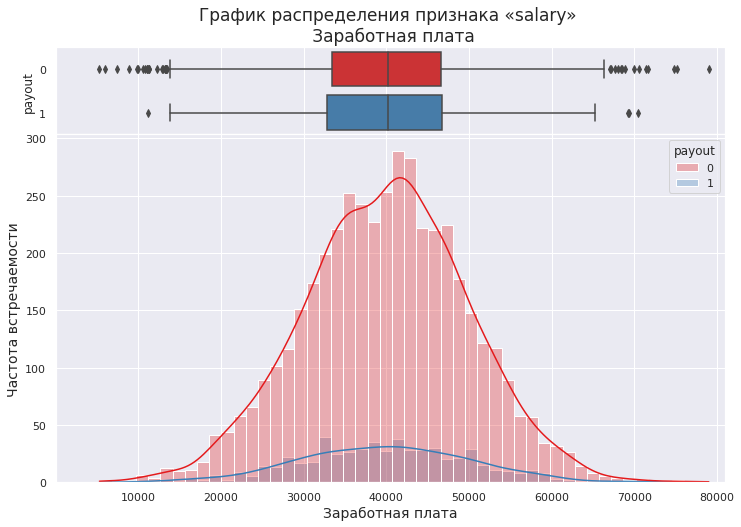

In [16]:
# оценка распределения признака заработная плата - salary
num_feature_research(
    'salary',
    'Заработная плата',
    x_lims=(5, 81000)
)

> * По уровню заработной платы распределение клиентов близко к нормальному со средним значением `≈40000`. 
> * Распределение клиентов по наличию/отсутствию страховых выплат совпадают по медианным значениям и характерам самих распределений. 
> * Пропущенных значений по данному признаку нет.

#### Количество членов семьи (`family_members`)

Рассмотрим распределение значений для атрибута количество членов семьи `family_members`.

Признак: «family_members»


count    5000.000000
mean        1.194200
std         1.091387
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: family_members, dtype: float64


-----------------------------------------------------------------------------------------------
| Количество пропущенных значений признака «family_members»:                      |   0.00000 |
-----------------------------------------------------------------------------------------------
| Доля пропущенных значений признака «family_members»:                            |   0.00000 |
-----------------------------------------------------------------------------------------------



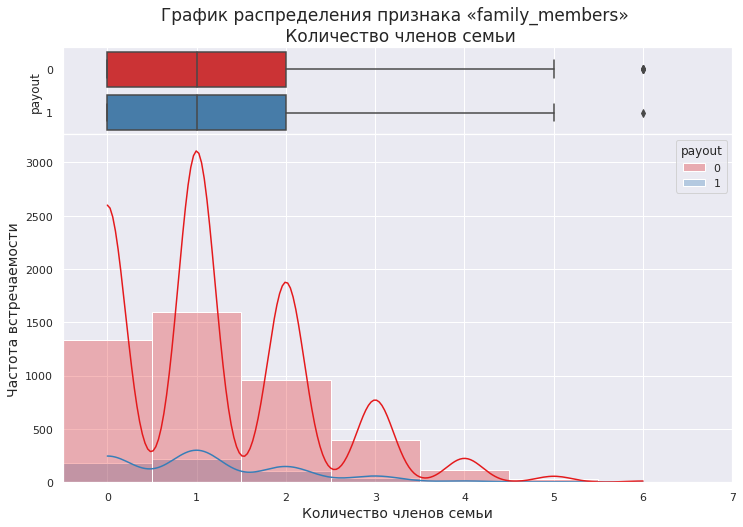

In [17]:
# оценка распределения признака количество членов семьи - family_members
num_feature_research(
    'family_members',
    'Количество членов семьи',
    x_lims=(-0.5, 7),
    discrete=True
)

> * По количеству членов семьи клиенты распределены в диапазоне от `0` до `6` лет, форма распределения близка к распределению Пуассона, медианное значение - `1`.
> * Распределения клиентов по наличию/отсутствию страховых выплат совпадают по медианным значениям и характерам распределений, пропущенных значений нет.

#### Проверка корреляций

Выделим обучающие признаки и целевую переменную.

In [18]:
# выделение обучающих признаков и целевой переменной
features = ['gender', 'age', 'salary', 'family_members']
target = ['pay_count']

Проведём оценку корреляций между обучающими и целевым признаком, а также оценим наличие возможной мультиколлинеарности между обучающими признаками. Для этого создадим вспомогательную функцию *show_corr_heatmap()*.

In [19]:
# функция отображения диагональной тепловой карты со значениями коэффициентов корреляции
def show_corr_heatmap(df_corr):
    """
    input: df_corr (pandas.DataFrame) - матрица корреляции
    output: None
    description: Функция принимает input параметры и проводит анализ признаков
    """
    df_corr = np.abs(df_corr).replace(1,0)

    mask = np.zeros_like(df_corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(15, 8))

    sns.heatmap(df_corr, mask=mask, annot=True, fmt=".5f", linewidths=.1, cmap= 'BuPu')
    plt.title('Матрица модулей коэффициентов корреляции', fontsize=15)
    plt.ylabel('Признак', fontsize=15)
    plt.xlabel('Признак', fontsize=15)
    
    return None

Создадим датафрейм с матрицей корреляции признаков.

In [20]:
# создание датафрейма с матрицей корреляции
df_corr = df[features + target].corr()
df_corr

,gender,age,salary,family_members,pay_count
gender,1.000000,0.002074,0.014910,-0.008991,0.010140
age,0.002074,1.000000,-0.019093,-0.006692,0.651030
salary,0.014910,-0.019093,1.000000,-0.030296,-0.014963
family_members,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
pay_count,0.010140,0.651030,-0.014963,-0.036290,1.000000


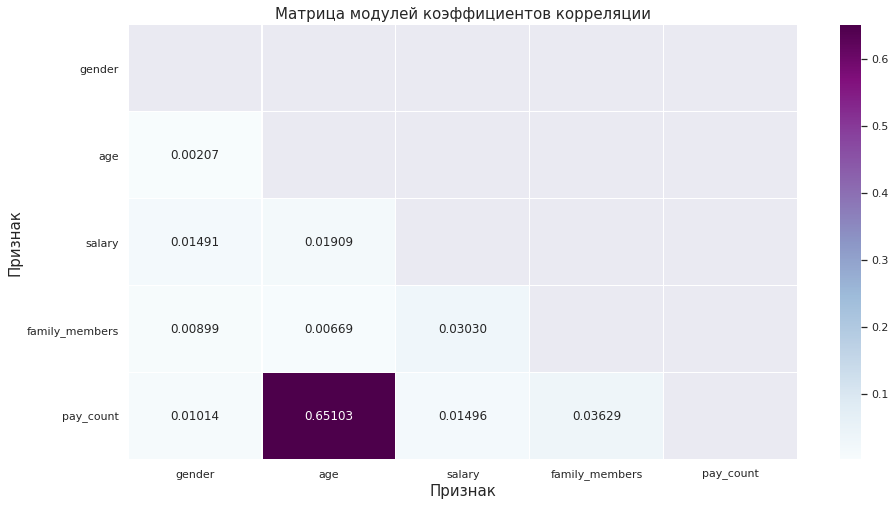

In [21]:
# визуализация тепловой карты с помощью функции show_corr_heatmap()
show_corr_heatmap(df_corr)

Построим график парных соотношений в исследуемом наборе данных.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


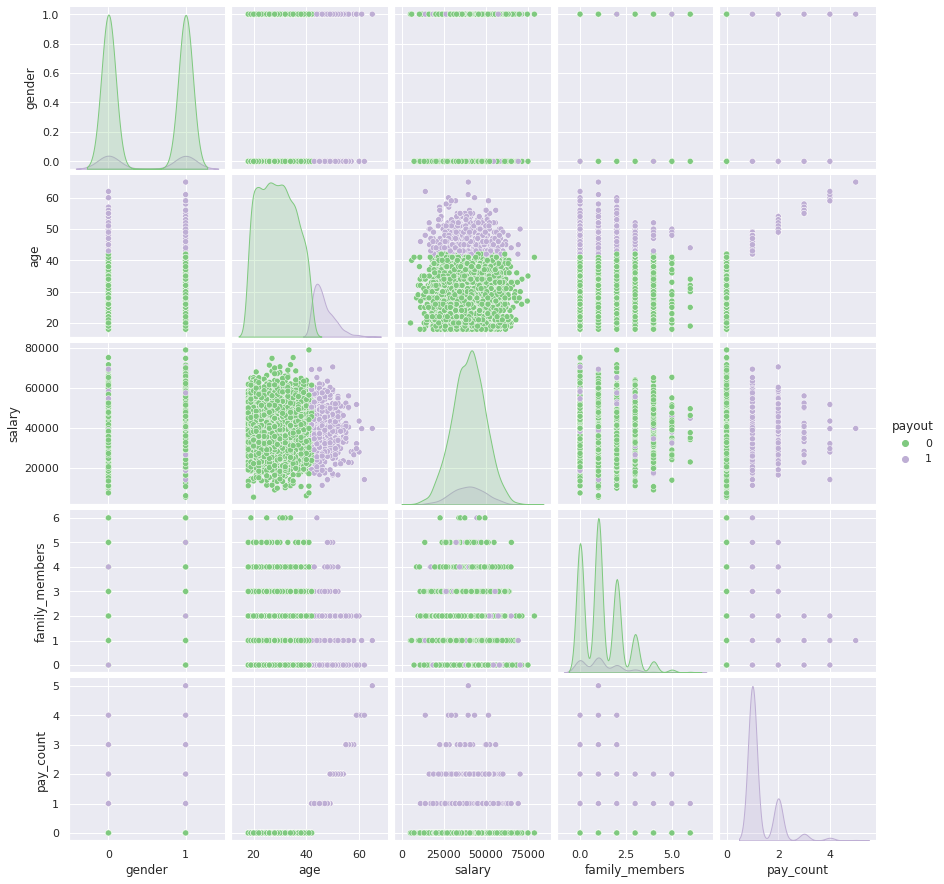

In [22]:
# построение графика парных соотношений
sns.set_palette(palette='Accent')
sns.pairplot(df, hue='payout');

> * Сильных корреляций между обучающими признаками нет.
> * Наибольшая корреляция между целевым и обучающим признаком отмечена для атрибута возраст `age`, что вполне ожидаемо, учитывая рассмотренное выше распределение по возрасту и наличию/отсутствию страховых выплат.

### Выводы по анализу данных

> * Полученные в файле `insurance.csv` исходные данные о клиентах страховой компании, содержат `5000` записей, пропуски в данных отсуствуют.
> * Данные соотвествуют описанию и имеют следующий состав обучающих признаков и целевой переменной:
>  - обучающие признаки:
>    - пол `gender`
>    - возраст `age`
>    - зарплата застрахованного клиента `salary`
>    - количество членов его семьи `family_members`
>  - целевой признак:
>    - количество страховых выплат клиенту за последние 5 лет `pay_count`.
> * Все значения атрибутов приведенны к целочисленному типу `int64`. 
> * Проведён анализ распределений признаков и оценка их корреляции с целевой переменной. Установлено, что наиболее сильно коррелирующим признаком с целевой переменной является такой атрибут как возраст `age`.
> * С учетом того, что на стадии анализа данных по возрасту выявлено чёткое разделение на наличие/отсутствие страховых выплат, заключающее в том, что все клиенты старше `42` лет имели страховые выплаты, а моложе `42` - нет, то целесообразно при формировании обучающей и тестовой выборок выполнить стратифицированное разделение по возрасту по границе `42` года.

## Применение свойств матриц в линейной регрессии

Рассмотрим задачу обучения модели линейной регрессии в терминах матричных операций.

### Задача проверки качества линейной регрессии

Задача:
**Определить изменится ли качество линейной регрессии при умножении матрицы признаков на обратимую матрицу?**

Рассмотрим решение исходной задачи обучения линейной регрессии:

Обозначения:

- $X_{(n×k)}$ — матрица признаков (нулевой столбец состоит из единиц), 

- $k$ - размерность признакового пространства,

- $y_{(n×1)}$ — вектор целевого признака

- $w_{(k×1)}$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $y_{pred\,(n×1)}$ — вектор предсказаний целевого признака, $y_{pred} = Xw$


Задача обучения линейной регрессии формулируется следующим образом:

$$
w = \arg\min_w MSE(Xw, y)
$$

, т.е. поиск такого значения $w$ при котором функция $MSE(y_{pred}, y)$ достигает минимума, т.е. метрика ошибки MSE (среднеквадратическая ошибка) между векторами предсказанных и исходных значений целевого признака минимальна.

Решением исходной задачи обучения линейной регрессии является такой вектор $w$:

$$
w = (X^T X)^{-1} X^T y
$$

, где:

- $X^T$ - транспонированная матрица $X$
- $(X^T X)^{-1}$ - матрица, обратная к произведению матриц $X^T X$

**Сформулируем решаемую нами задачу**:

**Дано**: матрица $P_{(k×k)}: \exists P_{(k×k)}^{-1}, P×P^{-1} = E$

Необходимо ответить на следующий вопрос: Изменится ли качество линейной регрессии при умножении матрицы $X$ на $P$.
Возможные варианты ответа:
1. Изменится - в этом случае необходимо привести примеры матриц.
2. Не изменится - в этом случае необходимо указать, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

При решении воспользуемся следующими основными свойствами матриц:

1. Произведение любой квадратной матрицы на единичную равно самой матрице
$$
E × A = A × E = A
$$


2. Обратная матрица транспонированной матрицы равна транспонированной от обратной
$$
(A^T)^{-1} = (A^{-1})^T
$$


3. Обратная матрица произведения матриц равна произведению обратных в обратном порядке
$$
(A × B)^{-1} = (B^{-1} × A^{-1})
$$


4. Транспонированная матрица произведения матриц равна произведению транспонированных матриц в обратном порядке
$$
(A×B)^T = B^T × A^T
$$

**Решение:**

Обозначим $X^{*} = XP$, при этом очевидно, что размерность матрицы $X^{*}$ совпадает с размерностью матрицы $X$.

Соответственно вектор весов линейной регрессии $w^{*}$ по приведенной выше формуле будет равен:

$w^{*} = (X^{*T} X^{*})^{-1} X^{*T} y = ((XP)^T XP)^{-1} (XP)^T y = (P^T X^T X P)^{-1} P^T X^T y = $

$= (P^{-1} (P^T X^T X)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} E X^T y = $

$= P^{-1} (X^T X)^{-1} X^T y = P^{-1} w$

Итого получено соотношение:

$w^{*} = P^{-1} w$

Соответственно вектор предсказаний целевого признака будет равен:

$y_{pred}^{*} = X^{*} w^{*} = X P P^{-1} w = X E w = Xw = y_{pred}$


**Ответ:**

При умножении матрицы признаков $X$ на обратимую матрицу $P$ качество линейной регрессии не изменяется. В этом случае вектор весов линейной регрессии $w^{*} = P^{-1} w$.

### Алгоритм преобразования матрицы признаков

Выведенное выше свойство справедливо для любой размерности признакового пространства. 

Рассмотрим частный случай применительно к решаемой в проекте задаче. Матрица исходных признаков с числом столбцов равным 5 (первый столбец - вектор единиц, далее - 4 обучающих признака: пол `gender`, возраст `age`, зарплата `salary`, количество членов семьи `family_members`).

В соответствии с полученным выше свойством достаточно найти обратимую матрицу $P$ размерности `5×5`:

$P_{5×5}: \exists P_{5×5}^{-1}$

Учитывая то, что критерием обратимости квадратной матрицы является её невырожденность (определитель матрицы должен быть больше 0), для решения задачи преобразования исходных данных без потери качества линейной регрессии достаточно взять произвольную матрицу с отличным от нуля определителем. 

В качестве примеров таких матриц могут служить, в частности, любая верхне- или нижнетреугольная матрица, у которых элементы главной диагонали отличны от 0. Возьмем, например, нижнетреугольную матрицу Паскаля.

In [23]:
# создание матрицы Паскаля
psc_matrix = pascal(5, kind='lower', exact=True)
psc_matrix

array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 2, 1, 0, 0],
       [1, 3, 3, 1, 0],
       [1, 4, 6, 4, 1]], dtype=uint64)

In [24]:
# получение обратной матрицы
np.linalg.inv(psc_matrix)

array([[ 1.,  0.,  0.,  0.,  0.],
       [-1.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1., -0., -0.],
       [-1.,  3., -3.,  1., -0.],
       [ 1., -4.,  6., -4.,  1.]])

Матрица P получена, обратная к ней существует. В соответствии с полученным выше свойством вектор весов линейной регрессии будет $w^{*} = P^{-1} w$.

### Выводы по применению свойств матриц в линейной регрессии

> * Проведено математическое доказательство того, что при умножении матрицы признаков $X$ на обратную матрицу $P$ качество линейной регрессии не изменяется.
> * Рассмотрен частный случай получения обратной матрицы `5×5` на основе нижнетреугольной матрицы Паскаля.

## Проверка алгоритма

Проведём проверку отсуствия влияния нашего преобразования на качество линейной регрессии.

Обучение модели линейной регрессии проведём на исходных и преобразованных предложенным выше способом данных, после чего сравним полученные результаты. Обучение модели будем проводить с помощью библиотеки *sklearn*, проверять и сопоставлять качество моделей - с помощью метрики *R2*.

### Обучение на исходных данных

Определим дополнительный атрибут возрастной категории для стратифицированного разделения исходных данных.

In [25]:
# создание нового признака для последующей стратификации данных
df['age_category'] = df['age'] < 42

Проведём разделение исходных данных на обучающую и тестовую выборки.

In [26]:
# разделение данных на обучающую и тестовую выборки
df_train, df_test = train_test_split(df, test_size=0.25, random_state=RND, stratify=df['age_category'])

Выделим целевую переменную из полученных выборок. 

In [27]:
# выделение целевой переменной из выборок
X_train = df_train[features] 
y_train = df_train[target]
x_test = df_test[features] 
y_test = df_test[target] 

Обучим модель на основе линейной регрессии и получим значение метрики *R2* на тестовой выборке.

In [28]:
# обучение модели линейной регрессии на исходных данных
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
predictions = model.predict(x_test)

r2_before = r2_score(y_test, predictions)

print('-' * 75)
print('| {: <60}|'.format('Значение метрики R2 на исходных данных:'), end='')
print('{: >10.7f} |'.format(r2_before))
print('-' * 75)

---------------------------------------------------------------------------
| Значение метрики R2 на исходных данных:                     | 0.4169525 |
---------------------------------------------------------------------------


### Обучение на преобразованных данных

Теперь выполним расмотренное выше преобразование исходных признаков путём умножения на обратимую матрицу.

Поскольку обучение модели будем проводить с помощью модели библиотеки sklearn, то добавление столбца единиц к матрице обучающих признаков выполнять не будем, соответственно для преобразования нам понадобится матрица размерности `4×4`.

Возьмём для примера нижнетреугольную матрицу Паскаля.

In [29]:
# создание матрицы Паскаля
psc_matrix = pascal(4, kind='lower', exact=True)

Выполним матричное преобразование обучающих признаков и тестовой выборок.

In [30]:
# выполнение матричных преобразований обучающей и тестовой выборок
df_train_conv = np.dot(df_train[features], psc_matrix)
df_test_conv = np.dot(df_test[features], psc_matrix)

Обучим модель линейной регрессии на преобразованных данных и получим значение метрики *R2* также на преобразованной тестовой выборке.

In [31]:
# обучение модели линейной регрессии на преобразованных данных
model = LinearRegression(n_jobs=-1)
model.fit(df_train_conv, y_train)
predictions = model.predict(df_test_conv)

r2_after = r2_score(y_test, predictions)

print('-' * 75)
print('| {: <60}|'.format('Значение метрики R2 на исходных данных данных:'), end='')
print('{: >10.7f} |'.format(r2_after))
print('-' * 75)

---------------------------------------------------------------------------
| Значение метрики R2 на исходных данных данных:              | 0.4169525 |
---------------------------------------------------------------------------


Значения метрики *R2* на исходных и преобразованных данных полностью идентичны.

В качестве другого примера возьмем случайную матрицу, проверим её обратимость.

In [32]:
# фиксация seed для воспроизводимости результата
np.random.seed(RND)

Создадим матрицу размерностью `4×4` и получим от неё обратную.

In [33]:
# создание матрицы 4×4
random_matrix = np.random.random((4,4))
random_matrix

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477],
       [0.71946897, 0.42310646, 0.9807642 , 0.68482974],
       [0.4809319 , 0.39211752, 0.34317802, 0.72904971],
       [0.43857224, 0.0596779 , 0.39804426, 0.73799541]])

In [34]:
# получение обратной матрицы от созданной на предыдущем шаге
matrix_inv = np.linalg.inv(random_matrix)
matrix_inv

array([[ 2.87678251,  0.14768629, -2.24879792, -0.06459009],
       [-0.58011171,  0.19553257,  3.20632074, -2.91553246],
       [-1.12144729,  1.44251433, -0.77907444,  0.2688062 ],
       [-1.057827  , -0.88161067,  1.49732637,  1.48418743]])

Аналогичным образом выполним матричное преобразование обучающих признаков и тестовой выборок.

In [35]:
# выполнение матричных преобразований обучающей и тестовой выборок
df_train_conv = np.dot(df_train[features], matrix_inv)
df_test_conv = np.dot(df_test[features], matrix_inv)

Обучим модель линейной регрессии на преобразованных данных и получим значение метрики *R2* также на преобразованной тестовой выборке.

In [36]:
# обучение модели линейной регрессии на преобразованных данных
model = LinearRegression(n_jobs=-1)
model.fit(df_train_conv, y_train)
predictions = model.predict(df_test_conv)

r2_after = r2_score(y_test, predictions)

print('-' * 75)
print('| {: <60}|'.format('Значение метрики R2 на исходных данных данных:'), end='')
print('{: >10.7f} |'.format(r2_after))
print('-' * 75)

---------------------------------------------------------------------------
| Значение метрики R2 на исходных данных данных:              | 0.4169525 |
---------------------------------------------------------------------------


Полученные значения метрик *R2* для всех трёх рассмотренных случаев совпадают, что говорит об отсуствии влияния на качество линейной регрессии умножения матрицы обучающих признаков на обратимую матрицу.

### Реализация линейной регрессии

Реализуем модель линейной регрессии в виде отдельного класса, в котором будет встроено рассмотренное матричное преобразование.

In [37]:
# класс линейной регрессии с матричным преобразованием
class LinearRegressionTMatrix():
    
    def __repr__(self):
        return 'Linear Regression with Matrix Transformation'
    
    
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        
        self.psc_matrix = pascal(train_features.shape[1] + 1, kind='lower', exact=True)
        X = np.dot(X, self.psc_matrix)
        
        y = train_target
        w_matrix = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

        self.weights = w_matrix

        
    def predict(self, test_features):
        X = np.concatenate((np.ones((test_features.shape[0], 1)), test_features), axis=1)
        
        return np.dot((np.dot(X, self.psc_matrix)), self.weights)

Обучим модель модифицированной линейной регрессии с матричным преобразованием и получим значение метрики *R2*.

In [38]:
# обучение модели линейной регрессии на преобразованных данных с помощью класса LinearRegressionMatrix
model = LinearRegressionTMatrix()
model.fit(df_train_conv, y_train)
predictions = model.predict(df_test_conv)

r2_pascal = r2_score(y_test, predictions)

print('-' * 75)
print('| {: <60}|'.format('Значение метрики R2 на исходных данных данных:'), end='')
print('{: >10.7f} |'.format(r2_pascal))
print('-' * 75)

---------------------------------------------------------------------------
| Значение метрики R2 на исходных данных данных:              | 0.4169527 |
---------------------------------------------------------------------------


И в данном случае значения метрики *R2* также ожидаемо совпадает с полученными выше значениями.

Сведём результаты различных моделей в единую таблицу для наглядного представления.

In [39]:
# создание сводной таблицы по результатам обучения моделей для финального этапа
r2_result_df = pd.DataFrame(
    [r2_before, 
     r2_after, 
     r2_pascal], 
    columns=['R2_value'],
    index=['Исходные данные', 
           'Преобразованные данные', 
           'LinearRegressionTMatrix'])

# просмотр полученных результатов
r2_result_df

,R2_value
Исходные данные,0.416953
Преобразованные данные,0.416953
LinearRegressionTMatrix,0.416953


### Выводы по применению свойств матриц

> * Выполнена практичекая проверка теоретического обоснования в ходе которой обучены модели линейной регрессии сначала на исходных (непреобразованных) данных, а затем проведено обучение на преобразованных путём умножения исходных признаков на обратимую матрицу данных. По обученным моделям получены *R2* метрики, которые ожидаемо оказались одинаковыми для моделей обученных на изменённых и неизменённых данных.
> * Реализован класс линейной регрессии *LinearRegressionTMatrix*, который выполняет матричное преобразование и обучает модель на изменённых данных. Класс протестирован в работе в результате чего получено значение *R2* метрики равное всем предыдущим моделям.


## Общие выводы

> 1. Полученные в файлe `insurance.csv` исходные данные о клиентах страховой компании загружены и проанализированы:
>    * в полученных данных содержалось  `5000` записей;
>    * данные соотвествуют описанию и имеют следующий состав обучающих признаков и целевой переменной:
>        - обучающие признаки:
>            - пол
>            - возраст 
>            - зарплата застрахованного клиента
>            - количество членов его семьи
>        - целевой признак:
>            - количество страховых выплат клиенту за последние `5` лет.
>    * все значения атрибутов приведенны к целочисленному типу;
>    * проведён анализ распределений признаков и оценка их корреляции с целевой переменной по результатам которого установлено, что наиболее сильно коррелирующим признаком с целевой переменной является возраст `age`;
>    * установлена целесообразность выполнения стратифицированного разделения по возрасту (по границе `42` года) при формировании обучающей и тестовой выборок.
>
>
> 2. Изучено применение свойств матриц в линейной регрессии:
>    * проведено математическое доказательство того, что при умножении матрицы признаков $X$ на обратную матрицу $P$ качество линейной регрессии не изменяется;
>    * рассмотрен частный случай получения обратной матрицы `5×5` на основе нижнетреугольной матрицы Паскаля.
>
>
> 3. Выполнена практическая проверка теоретических обоснований матричных преобразований:
>    * обучены модели линейной регрессии сначала на исходных (непреобразованных) данных, а затем проведено обучение на преобразованных путём умножения исходных признаков на обратимую матрицу данных;
>    * по обученным моделям получены *R2* метрики, которые ожидаемо оказались одинаковыми для моделей обученных на изменённых и неизменённых данных;
>    * реализован класс линейной регрессии *LinearRegressionTMatrix*, который выполняет матричное преобразование и обучает модель на изменённых данных, который протестирован в работе в результате чего получено значение *R2* метрики равное всем предыдущим моделям.
>
>
> Указанное матричное преобразорование обучающих признаков можно применять на практике при необходимости преобразования исходных данных (например, чтобы по ним было сложно восстановить персональную информацию). В зависимости от задачи  преобразования, можно варьировать вид используемой обратимой матрицы. 